In [10]:
# Here are the essential libraries that are being utilized in the code ahead
import numpy as np # For performing mathematical operations on arrays
import math # Mainly for the exponent function in math library
import matplotlib.pyplot as plt # For plotting graphs

In [11]:
# This program demonstrates the Hodgkin Huxley Model in current clamp experiments and shows action potential propagation.
#Time is in secs, voltage in mvs, conductances in m mho/mm^2, capacitance in uF/mm^2

# The given code was in Matlab. I have converted into Python

In [13]:
# Given the list vhist containing the Voltage values at different times, find the number of peaks
# To find a peak there are 2 conditions that need to be satisfied:
# a) Firstly, the voltage potential should be greater than the threshold potential
# b) Also, for it to be "peak", the value of potential should be greater than its neighbouring values

def find_peaks(v_hist):
    # Threshold voltage is assumed.
    threshold_v = 10
    # Counts the number of spikes observed.
    count = 0
    for i in range(1,len(v_hist)-1):
        # Condition (a)
        if(v_hist[i] >= threshold_v):
            # Condition (b)
            if((v_hist[i] > v_hist[i+1]) and (v_hist[i] > v_hist[i-1])):
                count += 1
    # Return the number of spikes observed.
    return count

In [14]:
# If given a list of the number of peaks (quantitatively the firing rate of neuron), find the threshold value of currents.
# There are three threshold values for externally applied currents:
# a) I1 marks the transition between no AP and finite AP's
# b) I2 marks the transition between finite AP's and Limit Cycle continuous firing
# c) I3 marks the transition between continuous firing and distortion leading to no APs

def find_current(num_peaks):
    # Intializing the threshold currents to zero.
    I1 = 0
    I2 = 0
    I3 = 0
    for i in range(1,len(num_peaks)-1):
        # Condition (a)
        if(num_peaks[i] > 0 and num_peaks[i-1] ==0):
            I1 = i
        # Condition (b)
        if(num_peaks[i+1] - num_peaks[i] > 4):
            I2 = i
        # Condtion (c)
        if(num_peaks[i] - num_peaks[i+1] > 3):
            I3 = i
    # Return all the three threshold currents.
    return I1, I2, I3

In [5]:
# In order to calculate the firing rates, I shall iterate the current from [0 , 0.7] at a consistent current step of 0.001
currents = [x*0.001 for x in range(0,700)]
# n_peaks will store the firing rate observed at each value of current
n_peaks = []

# Iterating over the entire range of currents mentioned above
for current in currents:
    # Declare all the constant values that are required for the evaluation purpose.
    gkmax = 0.36
    vk = -77
    gnamax = 1.20
    vna = 50
    gl = 0.003
    vl = -54.387
    cm = 0.01
    dt = 0.01
    
    # For calculating the firing rate, number of iterations is taken as 100000, to get a more precise graph.
    niter = 100000
    # Making the time list over which we will be iterating.
    t = [x*dt for x in range(0,niter)]

    # Initializing the values for voltage, probabilitites of m gate, h gate, n gate.
    v = -64.9964
    m = 0.0530
    h = 0.5960
    n = 0.3177

    # Making lists to store the values of "gna", "gk", "v", "m", "n" and "h" with changes in time.
    gnahist = [0 for x in range(niter)]
    gkhist = [0 for x in range(niter)]
    vhist = [0 for x in range(niter)]
    mhist = [0 for x in range(niter)]
    hhist = [0 for x in range(niter)]
    nhist = [0 for x in range(niter)]

    # Described below is the working of Hodgkin Huxley model, as given in the code itself as per the derived equations.
    iapp = current * np.ones((1,niter))
    iapp = [current * 1 for x in range(niter)]
    for i in range(0,niter):
        gna = gnamax * m**3 * h
        gk = gkmax * n**4
        gtot = gna + gk + gl
        vinf = ((gna * vna + gk * vk + gl * vl) + iapp[i]) / gtot
        tauv = cm / gtot
        v = vinf + (v - vinf) * math.exp(-dt / tauv)
        alpham = 0.1 * (v + 40) / (1 - math.exp(-(v + 40) / 10))
        betam = 4 * math.exp(-0.0556 * (v + 65))
        alphan = 0.01 * (v + 55) / (1 - math.exp(-(v + 55) / 10))
        betan = 0.125 * math.exp(-(v + 65) / 80)
        alphah = 0.07 * math.exp(-0.05 * (v + 65))
        betah = 1 / (1 + math.exp(-0.1 * (v + 35)))
        taum = 1 / (alpham + betam)
        tauh = 1 / (alphah + betah)
        taun = 1 / (alphan + betan)
        minf = alpham * taum
        hinf = alphah * tauh
        ninf = alphan * taun
        m = minf + (m - minf) * math.exp(-dt / taum)
        h = hinf + (h - hinf) * math.exp(-dt / tauh)
        n = ninf + (n - ninf) * math.exp(-dt / taun)
        vhist[i] = v
        mhist[i] = m
        hhist[i] = h
        nhist[i] = n
    
    # Count the number of spikes by calling the function
    peak_count = find_peaks(vhist)
    # Appending the count of spikes for later plotting the firing rate vs. external current
    n_peaks.append(peak_count)

    gna = []
    gk = []
    for i in range(len(mhist)):
        gna.append(gnamax * (mhist[i] ** 3) * hhist[i])
        gk.append(gkmax * (nhist[i] ** 4))

# Below is the code to print all the three graphs for the various current instances.
# But I have commented it out because that is not the goal of this file.
# It's role has been displayed in the other file.

#     print("Current: ", current)
#     plt.plot(t, vhist, color='b', label='Voltage')
#     plt.xlabel('Time(ms)')
#     plt.ylabel('Voltage(mV)')
#     plt.title('Voltage variation vs Time: I = {} uA/mm^2'.format(current))
#     plt.grid()
#     plt.show()

#     plt.plot(t, mhist, color='g', label='m')
#     plt.plot(t, nhist, color='r', label='n')
#     plt.plot(t, hhist, color='y', label='h')
#     plt.xlabel('Time(ms)')
#     plt.ylabel('Gating Variable Probabilities')
#     plt.title('Gating variables vs Time: I = {} uA/mm^2'.format(current))
#     plt.legend()
#     plt.grid()
#     plt.show()

#     plt.plot(t, gna, color='r', label='g_Na')
#     plt.plot(t, gk, color='y', label='g_K')
#     plt.xlabel('Time(ms)')
#     plt.ylabel('Conductance')
#     plt.title('Conductance variance vs Time: I = {} uA/mm^2'.format(current))
#     plt.legend()
#     plt.grid()
#     plt.show()

Current:  0.001
Current:  0.002
Current:  0.003
Current:  0.004
Current:  0.005
Current:  0.006
Current:  0.007
Current:  0.008
Current:  0.009000000000000001
Current:  0.01
Current:  0.011
Current:  0.012
Current:  0.013000000000000001
Current:  0.014
Current:  0.015
Current:  0.016
Current:  0.017
Current:  0.018000000000000002
Current:  0.019
Current:  0.02
Current:  0.021
Current:  0.022
Current:  0.023
Current:  0.024
Current:  0.025
Current:  0.026000000000000002
Current:  0.027
Current:  0.028
Current:  0.029
Current:  0.03
Current:  0.031
Current:  0.032
Current:  0.033
Current:  0.034
Current:  0.035
Current:  0.036000000000000004
Current:  0.037
Current:  0.038
Current:  0.039
Current:  0.04
Current:  0.041
Current:  0.042
Current:  0.043000000000000003
Current:  0.044
Current:  0.045
Current:  0.046
Current:  0.047
Current:  0.048
Current:  0.049
Current:  0.05
Current:  0.051000000000000004
Current:  0.052000000000000005
Current:  0.053
Current:  0.054
Current:  0.055
Curre

Current:  0.463
Current:  0.464
Current:  0.465
Current:  0.466
Current:  0.467
Current:  0.468
Current:  0.46900000000000003
Current:  0.47000000000000003
Current:  0.47100000000000003
Current:  0.47200000000000003
Current:  0.47300000000000003
Current:  0.47400000000000003
Current:  0.47500000000000003
Current:  0.47600000000000003
Current:  0.47700000000000004
Current:  0.47800000000000004
Current:  0.47900000000000004
Current:  0.48
Current:  0.481
Current:  0.482
Current:  0.483
Current:  0.484
Current:  0.485
Current:  0.486
Current:  0.487
Current:  0.488
Current:  0.489
Current:  0.49
Current:  0.491
Current:  0.492
Current:  0.493
Current:  0.494
Current:  0.495
Current:  0.496
Current:  0.497
Current:  0.498
Current:  0.499
Current:  0.5
Current:  0.501
Current:  0.502
Current:  0.503
Current:  0.504
Current:  0.505
Current:  0.506
Current:  0.507
Current:  0.508
Current:  0.509
Current:  0.51
Current:  0.511
Current:  0.512
Current:  0.513
Current:  0.514
Current:  0.515
Cur

The threshold values for the external applied currents are:
 I1 = 0.023uA/mm^2
 I2 = 0.062uA/mm^2
 I3 = 0.457uA/mm^2


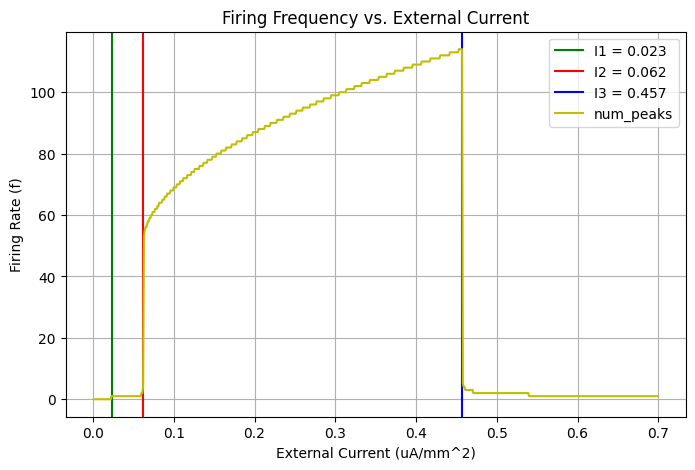

In [9]:
# First print the threshold current values
I1, I2, I3 = find_current(n_peaks)
print("The threshold values for the external applied currents are:")
print(" I1 = ", currents[I1], "uA/mm^2", sep="")
print(" I2 = ", currents[I2], "uA/mm^2", sep="")
print(" I3 = ", currents[I3], "uA/mm^2", sep="")

# Finally we need to plot the firing rate vs. external current graph
plt.figure(figsize=(8,5))
plt.axvline(x = currents[I1], color = 'g', label = 'I1 = {}'.format(currents[I1]))
plt.axvline(x = currents[I2], color = 'r', label = 'I2 = {}'.format(currents[I2]))
plt.axvline(x = currents[I3], color = 'b', label = 'I3 = {}'.format(currents[I3]))
plt.plot(currents, n_peaks, color = 'y', label = 'num_peaks')
plt.xlabel('External Current (uA/mm^2)')
plt.ylabel('Firing Rate (f)')
plt.title('Firing Frequency vs. External Current')
plt.legend()
plt.grid()
plt.show()